In [122]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
from wordcloud import WordCloud
import random
import seaborn as sns
from IPython.core.display import HTML

py.offline.init_notebook_mode(connected=True) 

In [123]:
#Tenemos la infomración en 2 idiommas así que creamos una lista de tuplas 
paises_europa = [("Albania", "Albania","AL"), ("Alemania", "Germany","DE"), ("Andorra", "Andorra"), ("Austria", "Austria","AT"), 
                ("Bélgica", "Belgium","BE"), ("Bielorrusia", "Belarus"), ("Bosnia y Herzegovina", "Bosnia and Herzegovina","BA"),
                ("Bulgaria", "Bulgaria","BG"), ("Croacia", "Croatia","HR"), ("Chipre", "Cyprus","CY"), ("Dinamarca", "Denmark","DK"), 
                ("Eslovaquia", "Slovakia","SK"), ("Eslovenia", "Slovenia","SI"), ("España", "Spain","ES"), ("Estonia", "Estonia","EE"), 
                ("Finlandia", "Finland","FI"), ("Francia", "France","FR"), ("Grecia", "Greece","EL"), ("Hungría", "Hungary","HU"), 
                ("Islandia", "Iceland","IS"), ("Irlanda", "Ireland","IE"), ("Italia", "Italy","IT"), ("Kosovo", "Kosovo"), 
                ("Letonia", "Latvia","LV"), ("Liechtenstein", "Liechtenstein"), ("Lituania", "Lithuania"), 
                ("Luxemburgo", "Luxembourg","LU"), ("Malta", "Malta","MT"), ("Moldavia", "Moldova"), ("Mónaco", "Monaco"), 
                ("Montenegro", "Montenegro","ME"), ("Noruega", "Norway"), ("Países Bajos", "Netherlands","NL"), ("Polonia", "Poland","PL"), 
                ("Portugal", "Portugal","PT"), ("Reino Unido", "United Kingdom","RU"), ("República Checa", "Czech Republic"), 
                ("República de Macedonia", "North Macedonia","MK"), ("Rumania", "Romania","RO"), ("Rusia", "Russia"), 
                ("San Marino", "San Marino"), ("Serbia", "Serbia","RS"), ("Suecia", "Sweden","SE"), ("Suiza", "Switzerland","CH"), 
                ("Ucrania", "Ukraine"), ("Vaticano", "Vatican City")]
#Creamos listas para filtrar las basses de datos por paises de Europa
pais =[x[0] for x in paises_europa]
country = [x[1] for x in paises_europa]


In [124]:
#Crecimiento de población en los últimos 22 años
europe_population = pd.read_csv('data/clean/europe_population', index_col=0)
growht_population = europe_population.groupby('Year')[['Population']].sum().reset_index()
growht_population

,Year,Population
0,2000,731570664
1,2001,731785413
2,2002,732018520
3,2003,732310982
4,2004,732882265
5,2005,733547837
6,2006,734276165
7,2007,735686579
8,2008,737465217
9,2009,738909944


In [125]:
#Sacar la tase de crecimiento anual (CAGR = (FV / PV) ** (1/n) - 1)
# FV es el valor final de la población (en este caso, el valor de la última fila del dataframe).
# PV es el valor inicial de la población (en este caso, el valor de la primera fila del dataframe).
# n es el número de años transcurridos entre el valor inicial y el valor final (en este caso, n = 23)

pv = growht_population.loc[0, 'Population']
fv = growht_population.iloc[-1, 1]
n = len(growht_population) - 1
cagr = (fv / pv) ** (1/n) - 1

print(f"El crecimiento promedio anual de la población es {cagr:.2%}")

El crecimiento promedio anual de la población es 0.11%


### Análisis de datos relacionado con el PIB de Europa por país
Fuentes [Banco Mundial](https://datos.bancomundial.org/indicador/NY.GDP.PCAP.CD?end=2021&locations=EU&name_desc=false&start=2000)
& [International Monetary Fund](https://www.imf.org/external/datamapper/NGDPDPC@WEO/ADVEC/EUQ)

In [126]:
pib_country = pd.read_csv('data/clean/pib_country', index_col=0)
growht_pib = pib_country.groupby('Year')['PIB_abs'].mean().reset_index()
growht_pib

,Year,PIB_abs
0,2000,20635.78440
1,2001,20696.22728
2,2002,22686.18036
3,2003,27616.51228
4,2004,31832.91428
5,2005,33849.65880
6,2006,36187.12728
7,2007,41840.69832
8,2008,45146.71664
9,2009,39911.61288


### Análisis de datos sobre desperdicios sólidos en Europa y España
Fuente [Eurostat](https://ec.europa.eu/eurostat/data/database) & [Ecoembes](ecoembestransparencia.com/datos/envases-domesticos-ligeros/)

In [127]:
#Lectura de archivo limpio total_waste

total_waste = pd.read_csv('data/clean/total_waste', index_col=0)
#Agregamos columna de año 2022 con base a l promedio de crecimiento en los últimos 22 años
# Cálculo del valor promedio de crecimiento para cada país
growth_mean = total_waste.groupby("Country Name")["Thousand_tonnes"].mean()

# Creación de un nuevo dataframe con el año 2022 y el valor de crecimiento promedio para cada país
df_2022 = pd.DataFrame({
    "Country Name": growth_mean.index,
    "Year": 2022,
    "Thousand_tonnes": growth_mean.values
})

# Filtrar las filas del DataFrame original que tengan el año 2022 y eliminar las filas duplicadas
total_waste = total_waste.query("Year != 2022").drop_duplicates(subset=["Country Name", "Year"], keep="last")

# Unión de las tablas original con la nueva infomración de 2022 
total_waste = pd.concat([total_waste, df_2022])

In [128]:
mean_groght = total_waste['Thousand_tonnes'].diff().mean()

In [129]:
#Creación del promedio de generación de basura en Europa por año
growht_waste = total_waste.groupby('Year')['Thousand_tonnes'].mean().reset_index()

#cambio columna de Year a int 
growht_waste['Year'] = growht_waste['Year'].astype(int)

growht_waste = growht_waste.sort_values(by='Year', ignore_index=True)

Rankings de Población, PIB y generación de basura.

In [130]:
#Agrupación de dataFrame por Country Name y promedio de población de los años evaluados
population_sorted = europe_population.groupby('Country Name').Population.mean().reset_index()

#Orden de los valores de forma descendiente
population_sorted = population_sorted.sort_values(ascending=False, by='Population',ignore_index=True)

population_top_10 = population_sorted.head(10)

In [131]:
pib_sorted = pib_country.groupby('Country Name')['PIB_abs'].mean().reset_index()
pib_sorted = pib_sorted.sort_values(ascending=False, by='PIB_abs',ignore_index=True)
pib_top_10 = pib_sorted.head(10)

In [132]:
#Creamos una lista del top 10 de los paises que más basura generan
waste_sorted = total_waste.groupby('Country Name')['Thousand_tonnes'].mean().reset_index()
waste_sorted = waste_sorted.sort_values(ascending=False, by='Thousand_tonnes', ignore_index=True)
waste_top_10 = waste_sorted.head(10)
waste_top_10
#

,Country Name,Thousand_tonnes
0,Germany,50309.500000
1,France,34584.181818
2,Türkiye,30036.136364
3,Italy,29185.954545
4,United Kingdom,28521.727273
5,Spain,23861.181818
6,Poland,11764.909091
7,Netherlands,9338.181818
8,Romania,6544.727273
9,Switzerland,5538.545455


In [133]:
# Filtrar los datos correspondientes a España y al año 2022
spain_2022 = total_waste[(total_waste["Country Name"] == "Spain") & (total_waste["Year"] == 2022)]

# Calcular el total de la producción mundial en 2022
total_2022 = total_waste[total_waste["Year"] == 2022]["Thousand_tonnes"].sum()

# Calcular el porcentaje de España respecto al total
percentage_spain_2022 = spain_2022["Thousand_tonnes"].iloc[0] / total_2022 * 100

print(f'Total de basura Europa {round(total_2022,2)}')
print(f"El porcentaje de basura en España en 2022 es: {percentage_spain_2022:.2f}% thousand tonnes")

Total de basura Europa 288871.64
El porcentaje de basura en España en 2022 es: 8.26% thousand tonnes


In [134]:
#Creacion de lista con los rankings por categoría 
ranking_pib = []
for x in waste_top_10['Country Name']:
    ranking_pib.append(pib_sorted.index[pib_sorted['Country Name'].str.contains(x)])

ranking_pop = []
for x in waste_top_10['Country Name']:
    ranking_pop.append(population_sorted.index[population_sorted['Country Name'].str.contains(x)])

rankings = pd.DataFrame({'Ranking Population':ranking_pop, 'Country Name':waste_top_10['Country Name'].values, 'Ranking GDP':ranking_pib})

rankings

,Ranking Population,Country Name,Ranking GDP
0,"Int64Index([1], dtype='int64')",Germany,"Int64Index([12], dtype='int64')"
1,"Int64Index([2], dtype='int64')",France,"Int64Index([13], dtype='int64')"
2,"Int64Index([], dtype='int64')",Türkiye,"Int64Index([], dtype='int64')"
3,"Int64Index([4], dtype='int64')",Italy,"Int64Index([14], dtype='int64')"
4,"Int64Index([3], dtype='int64')",United Kingdom,"Int64Index([10], dtype='int64')"
5,"Int64Index([6], dtype='int64')",Spain,"Int64Index([15], dtype='int64')"
6,"Int64Index([7], dtype='int64')",Poland,"Int64Index([21], dtype='int64')"
7,"Int64Index([9], dtype='int64')",Netherlands,"Int64Index([7], dtype='int64')"
8,"Int64Index([8], dtype='int64')",Romania,"Int64Index([22], dtype='int64')"
9,"Int64Index([18], dtype='int64')",Switzerland,"Int64Index([2], dtype='int64')"


### Visualizaciones

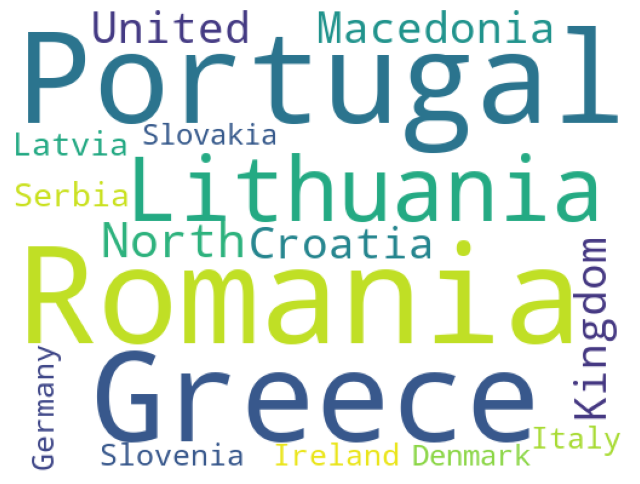

In [135]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384,
                         ).generate(" ".join(random.sample(waste_sorted['Country Name'].tolist(),15)))


plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

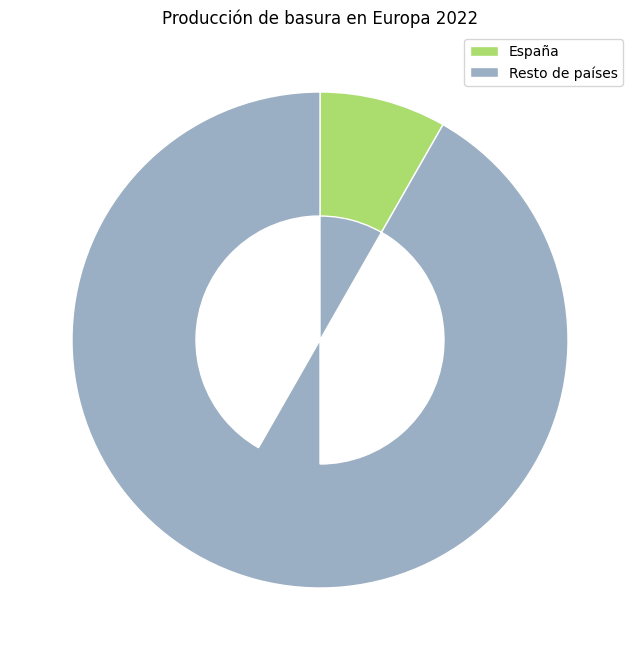

In [136]:
# Calcular el porcentaje del resto de países en 2022
percentage_rest_2022 = 100 - percentage_spain_2022

# Crear el gráfico de donut
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
width = 1.5

# Agregar los datos de España
ax.pie([percentage_spain_2022, percentage_rest_2022], radius=1, colors=['#aadd6d', '#9bafc4'],
       startangle=90, counterclock=False, wedgeprops=dict(width=width, edgecolor='w'))

# Agregar la leyenda y el título
ax.legend(['España', 'Resto de países'], loc='best')
ax.set_title('Producción de basura en Europa 2022')

# Mostrar el gráfico
plt.show()

In [137]:
import plotly.graph_objs as go
import plotly.io as pio

# Crear la figura
fig = go.Figure()

# Añadir la línea
fig.add_trace(go.Scatter(
    x=growht_population['Year'],
    y=growht_population['Population'],
    mode='lines+markers',
    line=dict(color='#ad005b', width=2, dash='dot'),
    marker=dict(color='#efb22d', size=8),
    name='Population growth'
))

# Configurar el fondo
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Configurar las leyendas y etiquetas
fig.update_layout(
    title='Population Growth',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Population'),
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=50, r=50, t=50, b=50),
)

# Mostrar la gráfica
pio.show(fig)


In [138]:
# Crear subplots con 2 ejes y misma escala en el eje x
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Agregar trazos para población
fig.add_trace(go.Scatter(
    x=growht_population['Year'],
    y=growht_population['Population'],
    mode='lines+markers',
    line=dict(color='#ad005b', width=2, dash='dot'),
    marker=dict(color='#efb22d', size=8),
    name='Population growth',
), secondary_y=False)

# Agregar trazos para PIB
fig.add_trace(go.Scatter(
    x=growht_pib['Year'], y=growht_pib['PIB_abs'],
    name='GDP (USD)',
    mode='lines+markers',
    line=dict(color='#1f77b4', width=3, dash='solid'),
    marker=dict(color='#1eb53a', size=8)),
    secondary_y=True)


# Configurar el fondo
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Personalizar el layout
fig.update_layout(title='Population and GDP growth',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  yaxis2_title='GDP (USD)',
                  yaxis=dict(title='Population', titlefont=dict(color='#ad005b'), tickfont=dict(color='#ad005b')),
                  yaxis2=dict(title='GDP (USD)', titlefont=dict(color='#1eb53a'), tickfont=dict(color='#1f77b4')),
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar la figura
fig.show()


In [139]:
# Crear subplots con 2 ejes y misma escala en el eje x
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Agregar trazos para población
fig.add_trace(go.Scatter(
    x=growht_population['Year'],
    y=growht_population['Population'],
    mode='lines+markers',
    line=dict(color='#ad005b', width=2, dash='dot'),
    marker=dict(color='#efb22d', size=8),
    name='Population growth',
), secondary_y=False)

# Agregar trazos para PIB
fig.add_trace(go.Scatter(
    x=growht_waste['Year'], y=growht_waste['Thousand_tonnes'],
    name='Waste',
    mode='lines+markers',
    line=dict(color='#99897c', width=3, dash='solid'),
    marker=dict(color='#608e3a', size=8)),
    secondary_y=True)


# Configurar el fondo
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Personalizar el layout
fig.update_layout(title='Population and Waste growth',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  yaxis2_title='Waste growht',
                  yaxis=dict(title='Population', titlefont=dict(color='#ad005b'), tickfont=dict(color='#ad005b')),
                  yaxis2=dict(title='Waste (Thousand_tonnes)', titlefont=dict(color='#99897c'), tickfont=dict(color='#1f77b4')),
                  legend=dict(yanchor="top", y=0.7, xanchor="left", x=0.01),
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar la figura
fig.show()


In [140]:
# Crear subplots con 2 ejes y misma escala en el eje x
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Agregar trazos para basura
fig.add_trace(go.Scatter(
    x=growht_waste['Year'], y=growht_waste['Thousand_tonnes'],
    name='Waste',
    mode='lines+markers',
    line=dict(color='#99897c', width=3, dash='solid'),
    marker=dict(color='#608e3a', size=8)),
    secondary_y=False)
    

# Agregar trazos para PIB
fig.add_trace(go.Scatter(
    x=growht_pib['Year'], y=growht_pib['PIB_abs'],
    name='GDP (USD)',
    mode='lines+markers',
    line=dict(color='#1f77b4', width=3, dash='solid'),
    marker=dict(color='#1eb53a', size=8)),
    secondary_y=True)


# Configurar el fondo
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Personalizar el layout
fig.update_layout(title='Waste and GDP growth',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  yaxis2_title='GDP (USD)',
                  yaxis=dict(title='Waste growht (Thousand_tonnes)', titlefont=dict(color='#99897c'), tickfont=dict(color='#608e3a')),
                  yaxis2=dict(title='GDP (USD)', titlefont=dict(color='#1eb53a'), tickfont=dict(color='#1f77b4')),
                  legend=dict(yanchor="top", y=0.6, xanchor="left", x=0.01),
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar la figura
fig.show()


In [141]:
# Crear la figura con plotly express
fig = px.scatter(total_waste, x="Year", y="Thousand_tonnes", color="Country Name", size="Thousand_tonnes")

# Personalizar la figura
fig.update_layout(
    title="Waste Growht per Country",
    xaxis_title="Year",
    yaxis_title="Waste (thousand tonnes)",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    ),
    plot_bgcolor="#f5f5f5"
)

# Mostrar la figura
fig.show()

In [142]:
#DataFrame solo con valores de España

#Creación de DF con población
spain_data = europe_population[europe_population['Country Name']== 'Spain'].reset_index(drop='index')

#Agregar columna de PIB por año
spain_data['PIB_abs'] = pib_country[pib_country['Country Name']=='Spain'].sort_values(by='Year')['PIB_abs'].values

#Agregar columna de basura por año
spain_waste = total_waste[total_waste['Country Name']== 'Spain']

# spain_data['PIB per_capita'] = spain_data['PIB_abs'] / spain_data['Population']
spain_data = spain_data.sort_values(by='Year')
spain_data

,Country Name,Year,Population,PIB_abs
22,Spain,2000,40589004,29198.086
21,Spain,2001,41046894,30089.517
20,Spain,2002,41639614,27039.180
19,Spain,2003,42321028,29576.250
18,Spain,2004,43000157,30423.167
17,Spain,2005,43704367,28196.759
16,Spain,2006,44431750,26535.546
15,Spain,2007,45211636,25764.215
14,Spain,2008,45910365,29524.755
9,Spain,2009,46290324,32131.382


In [143]:
# Crear subplots con 2 ejes y misma escala en el eje x
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Agregar trazos para población
fig.add_trace(go.Scatter(
    x=spain_data['Year'],
    y=spain_data['Population'],
    mode='lines+markers',
    line=dict(color='#ad005b', width=2, dash='dot'),
    marker=dict(color='#efb22d', size=8),
    name='Population growth',
), secondary_y=False)

# Agregar trazos para PIB
fig.add_trace(go.Scatter(
    x=spain_data['Year'], y=pib_country[pib_country['Country Name']=='Spain'].sort_values(by='Year')['PIB_abs'].values,
    name='GDP (USD)',
    mode='lines+markers',
    line=dict(color='#1f77b4', width=3, dash='solid'),
    marker=dict(color='#1eb53a', size=8)),
    secondary_y=True)


# Configurar el fondo
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Personalizar el layout
fig.update_layout(title='Spain Population and GDP growth',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  yaxis2_title='GDP (USD)',
                  yaxis=dict(title='Population', titlefont=dict(color='#ad005b'), tickfont=dict(color='#ad005b')),
                  yaxis2=dict(title='GDP (USD)', titlefont=dict(color='#1eb53a'), tickfont=dict(color='#1f77b4')),
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar la figura
fig.show()


In [144]:
# Crear subplots con 2 ejes y misma escala en el eje x
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# Información para el gráfico de población
fig.add_trace(go.Scatter(
    x=spain_data['Year'],
    y=spain_data['Population'],
    mode='lines+markers',
    line=dict(color='#ad005b', width=2, dash='dot'),
    marker=dict(color='#efb22d', size=8),
    name='Population growth',
), secondary_y=False)

# Información para el gráfico de generación de basura
fig.add_trace(go.Scatter(
    x=spain_waste['Year'], y=spain_waste['Thousand_tonnes'],
    name='Waste',
    mode='lines+markers',
    line=dict(color='#99897c', width=3, dash='solid'),
    marker=dict(color='#608e3a', size=8)),
    secondary_y=True)


# Configuración de fondo de gráfico
fig.update_layout(
    paper_bgcolor='rgba(215,229,226,0.9)',  # color del fondo
    plot_bgcolor='rgba(255,255,255,0.7)',   # color de la gráfica
)

# Personalizar el layout
fig.update_layout(title='Spain Population and Waste growth',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  yaxis2_title='Waste growht',
                  yaxis=dict(title='Population', titlefont=dict(color='#ad005b'), tickfont=dict(color='#ad005b')),
                  yaxis2=dict(title='Waste (Thousand_tonnes)', titlefont=dict(color='#99897c'), tickfont=dict(color='#1f77b4')),
                  legend=dict(yanchor="top", y=0.7, xanchor="left", x=0.01),
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar la figura
fig.show()

#### Selección de paises a analizar y comparar
Debido a la cantidad de paises solo se seleccionarán 6, esto será por medio de un "Join" 
en el que se revisará le coincidencia en el top10 entre PIB, waste y Population

In [145]:
#lectura de información basura en españa
contenedores = pd.read_csv('data/clean/contenedores', index_col=0)
sankey_waste = contenedores[contenedores['AÑO']==2021]

In [146]:
total_waste_spain = total_waste[total_waste['Country Name']== 'Spain'].sort_values('Year')
data3 = pd.read_excel('data/original/Seleccion-y-Reciclado-2021.xlsx', sheet_name='Tabla Seleccion')

In [147]:
# Datos
total_basura = int(total_waste_spain[total_waste_spain['Year']==2021]['Thousand_tonnes']*1000)
amarillo = int((sankey_waste['Cont AMARILLO'].sum())/1000)
azul = int((sankey_waste['Cont AZUL'].sum())/1000)
vidrio = 884097
otros = int(total_basura - ((amarillo + azul + vidrio)))
resto = otros*0.53
organico = otros*0.4
plastico = int((data3[data3['AÑO']==2021]['Plásticos (Tn)'].sum()))
metal = int((data3[data3['AÑO']==2021]['Metales (Tn)'].sum()))
bricks = int((data3[data3['AÑO']==2021]['Cartón bebidas (Tn)'].sum()))
papel_carton = int((data3[data3['AÑO']==2021]['Papel/Cartón (Tn)'].sum()))
madera = int((data3[data3['AÑO']==2021]['Madera (Tn)'].sum()))

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Total", "Amarillo", "Azul", "Vidrio", "Resto", "Orgánico", "Plástico", "Metal", "Bricks",  "Papel/Cartón", "Madera"], 
      color = ["darkgrey", "yellow", "blue","green", "grey","brown", "lightgreen", "grey", "brown", "white", "turquoise"]
    ),
    link = dict(
      source = [0, 0, 0, 0, 0, 1, 1, 1, 2, 2],
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      value = [amarillo, azul, vidrio, resto, organico, plastico, metal, bricks, papel_carton, madera]
  ))])

# Personalización del gráfico
fig.update_layout(title_text="Waste Sankey graph",
                  font=dict(size=15))

# Muestra el gráfico
fig.show()

In [148]:
# Datos
total_basura = int(total_waste_spain[total_waste_spain['Year']==2021]['Thousand_tonnes']*100)
amarillo = int((sankey_waste['Cont AMARILLO'].sum())/1000)
azul = int((sankey_waste['Cont AZUL'].sum())/1000)
vidrio = 884097
otros = int(total_basura - ((amarillo + azul + vidrio)))
plastico = int((data3[data3['AÑO']==2021]['Plásticos (Tn)'].sum()))
metal = int((data3[data3['AÑO']==2021]['Metales (Tn)'].sum()))
bricks = int((data3[data3['AÑO']==2021]['Cartón bebidas (Tn)'].sum()))
papel_carton = int((data3[data3['AÑO']==2021]['Papel/Cartón (Tn)'].sum()))
madera = int((data3[data3['AÑO']==2021]['Madera (Tn)'].sum()))

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Total", "Amarillo", "Azul", "Vidrio", "Otros", "Plástico", "Metal", "Bricks",  "Papel/Cartón", "Madera"], 
      color = ["grey", "yellow", "blue", "green", "brown", "lightgreen", "grey", "brown", "white", "turquoise"]
    ),
    link = dict(
      source = [0, 0, 0, 0, 1, 1, 1, 2, 2],
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9],
      value = [amarillo, azul, vidrio, otros, plastico, metal, bricks, papel_carton, madera]
  ))])

# Personalización del gráfico
fig.update_layout(title_text="Waste Sankey graph",
                  font=dict(size=15))

# Muestra el gráfico
fig.show()


In [149]:
# Crear la figura con plotly express
fig = px.scatter(contenedores, x="AÑO", y="Total KG Recogidos", color="CCAA", size="Total KG Recogidos")

# Personalizar la figura
fig.update_layout(
    title="Waste Growht per Community",
    xaxis_title="Year",
    yaxis_title="Waste (KG)",
    font=dict(
        family="Arial",
        size=18,
        color="#7f7f7f"
    ),
    plot_bgcolor="#f5f5f5"
)

# Mostrar la figura
fig.show()

In [150]:
fig= px.line(contenedores,x='AÑO', y="Total KG Recogidos", color='CCAA', markers='dots')
fig.show()

In [151]:
population_per_CCAA = pd.read_csv('data/clean/population_per_CCAA', index_col=0)
population_per_CCAA = population_per_CCAA.rename(columns={'Periodo':'AÑO'})
population_per_CCAA


,CCAA,AÑO,Población
0,ANDALUCIA,2021,8472407
1,ANDALUCIA,2020,8464411
2,ANDALUCIA,2019,8414240
3,ANDALUCIA,2018,8384408
4,ANDALUCIA,2017,8379820
...,...,...,...
451,MELILLA,2002,69184
452,MELILLA,2001,68789
453,MELILLA,2000,66263
454,MELILLA,1999,56929


In [173]:
graph_population_CCAA = population_per_CCAA.groupby('CCAA')[['Población']].mean(). reset_index()
graph_population_CCAA = graph_population_CCAA.sort_values(by='Población')

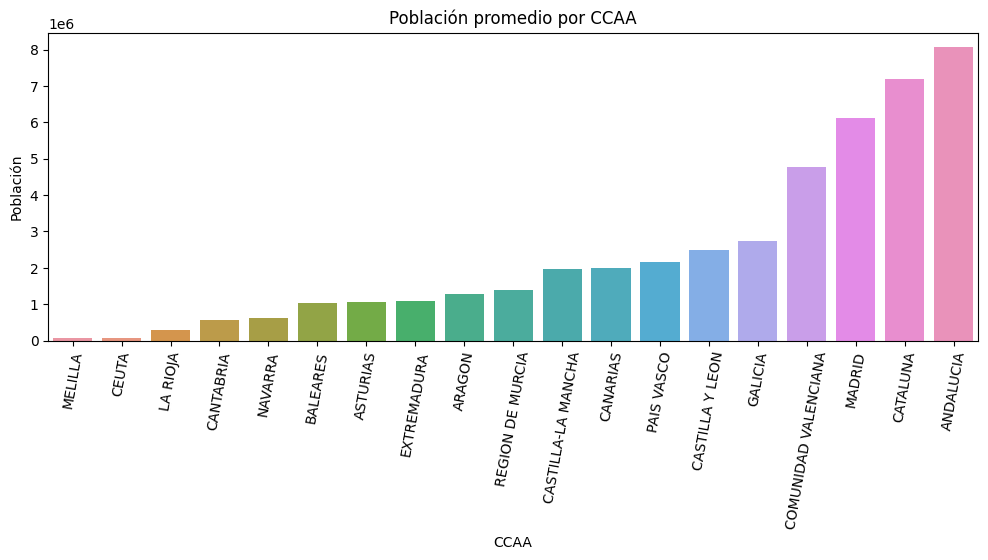

In [178]:
plt.figure(figsize=(12,4))
sns.barplot(x=graph_population_CCAA['CCAA'], y=graph_population_CCAA['Población'])
plt.title("Población promedio por CCAA")
plt.xticks(rotation=80)
plt.show()

In [152]:
comparation_2021 = pd.merge(population_per_CCAA, contenedores, on=['AÑO','CCAA'])
comparation_2021 = comparation_2021[comparation_2021['AÑO']==2021]
comparation_2021 = comparation_2021.sort_values('Población', ascending=True).reset_index(drop=True)
comparation_2021

,CCAA,AÑO,Población,Cont AMARILLO,HABITANTES,Cont AZUL,Nº Habitantes,Total KG Recogidos
0,CEUTA,2021,83517,645160,84202,418182,84202,1063342
1,MELILLA,2021,86261,593480,87076,1301551,87076,1895031
2,LA RIOJA,2021,319796,5981431,319531,7834720,319914,13816151
3,CANTABRIA,2021,584507,7342846,582845,10222392,582845,17565238
4,NAVARRA,2021,661537,16210215,607813,28051255,660298,44261470
5,ASTURIAS,2021,1011792,16534377,1018782,22924746,1018783,39459123
6,EXTREMADURA,2021,1059501,15044340,1060059,16073429,1060421,31117769
7,BALEARES,2021,1173008,33186460,1171543,36704105,1171543,69890565
8,ARAGON,2021,1326261,24291453,1329028,27524217,1328793,51815670
9,REGION DE MURCIA,2021,1518486,23155070,1510220,21811322,1510220,44966392


In [153]:
conclusion = pd.read_excel('data/original/conclusion.xlsx')
conclusion = round(conclusion[['Valencia','Madrid','Cataluña','España','Europa','Mundo']].astype(float),2)
conclusion

,Valencia,Madrid,Cataluña,España,Europa,Mundo
0,5.06,6.75,7.76,47.16,447.00,7905.00
1,1.54,3.17,3.66,22.37,203.01,11230.00
2,0.83,1.29,1.29,1.30,1.24,3.89
3,NaN,NaN,NaN,NaN,NaN,NaN
4,25.02,38.58,38.74,38.99,37.33,116.76
5,11.76,18.13,18.21,18.33,17.54,54.88
6,41.28,63.64,63.91,64.32,61.58,192.62


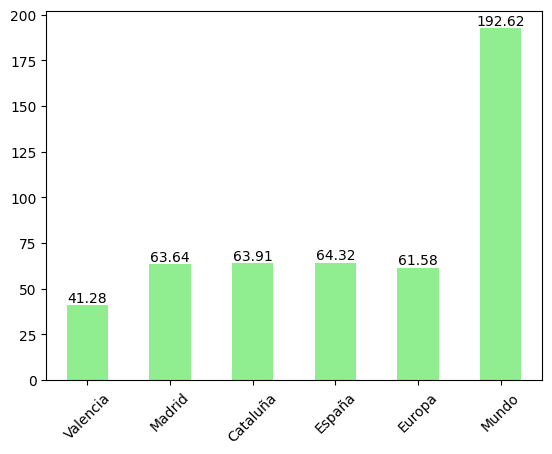

In [154]:
# Seleccionar la última fila del DataFrame
last_row = conclusion.iloc[-1]

# Crear un gráfico de barras con color verde
ax = last_row.plot.bar(color='lightgreen',rot=45)

# Agregar valores a las barras
for i, v in enumerate(last_row):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()